In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/03/10172251/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


##  Vẽ biểu đồ để trực quan hóa mối quan hệ giữa lượng sản phẩm được bán ra với lần lượt chi phí quảng  cáo trên TV, Radio và báo chí bằng hình ảnh, dùng 1 biểu đồ cho mỗi loại hình quảng cáo.

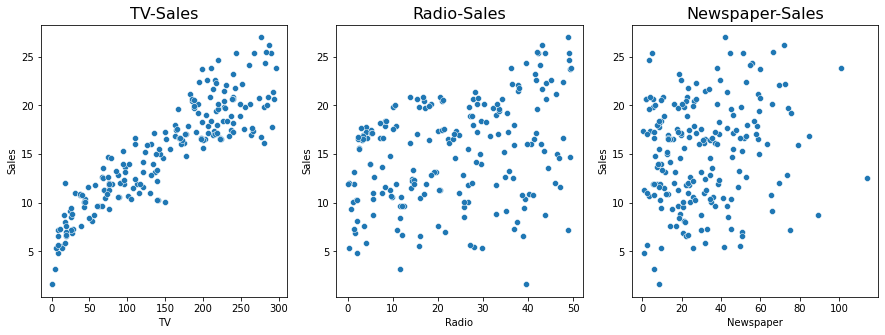

In [18]:
fig, axs = plt.subplots(1,3, figsize = (15,5))
sns.scatterplot(x = 'TV', y = 'Sales', data = df, ax=axs[0])
sns.scatterplot(x = 'Radio', y = 'Sales', data = df, ax=axs[1])
sns.scatterplot(x = 'Newspaper', y = 'Sales', data = df, ax=axs[2])
axs[0].set_title('TV-Sales', fontsize = 16)
axs[1].set_title('Radio-Sales', fontsize = 16)
axs[2].set_title('Newspaper-Sales', fontsize = 16)
plt.show()

In [21]:
X = df.iloc[:,:-1]
y = df['Sales']
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

## Sử dụng Linear Regression

In [23]:
model = LinearRegression()
model = model.fit(X_train,y_train)

## Đánh giá mô hình trên tập train

In [29]:
MSE_train = mean_squared_error(y_train, model.predict(X_train))
r2_train = r2_score(y_train, model.predict(X_train))
print(f'Mean square error tập train: {MSE_train}')
print(f'R-square tập train: {r2_train}')

Mean square error tập train: 2.2674791924556557
R-square tập train: 0.9132130769530317


### Conclusion: 
- Mô hình tốt trên tập train và dự đoán được hầu hết các trường hợp

## Đánh giá mô hình trên tập test

In [31]:
MSE_test = mean_squared_error(y_test, model.predict(X_test))
r2_test = r2_score(y_test, model.predict(X_test))
print(f'Mean square error tập train: {MSE_test}')
print(f'R-square tập train: {r2_test}')

Mean square error tập train: 4.522552562041291
R-square tập train: 0.8645053923967724


### Conclusion :
- Mô hình dự đoán khá tốt trên tập test và độ bao phủ cũng rất tốt